<a href="https://colab.research.google.com/github/Sudu-hub/supermarket_sales_analysis/blob/main/Project_1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Super-mart Sales Analytics

## Import Libraries

In [305]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

## Task 1: Inital Data Exploration

In [306]:
data = pd.read_csv("supermarket_sales.csv")

In [307]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [308]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [309]:
data.shape

(1003, 17)

In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [311]:
data.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [312]:
data.duplicated().sum()

3

In [313]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.131488e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [314]:
# I am dropping the invoice ID, Date, Time column in dataset
data = data.drop(["Invoice ID", "Date", "Time"], axis=1)

In [315]:
data["gross margin percentage"].unique()

array([4.76190476])

In [316]:
# one more column droping on the dataset is gross margin percentage
data = data.drop(["gross margin percentage"], axis=1)

## Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

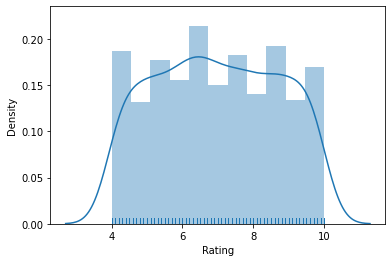

In [317]:
sns.distplot(data.Rating, rug=True)

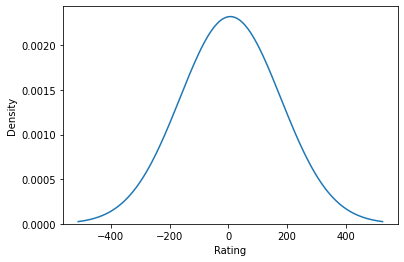

In [318]:
sns.kdeplot(data.Rating, bw=100)

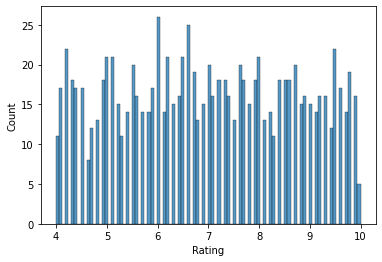

In [319]:
sns.histplot(data.Rating, bins=100)

**Question 2:** Do aggregate sales numbers differ by much between branches?

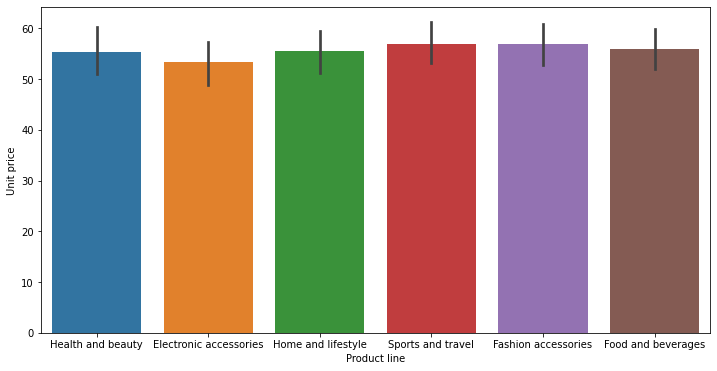

In [320]:
plt.figure(figsize= (12,6))
sns.barplot(x = data["Product line"], y = data["Unit price"])

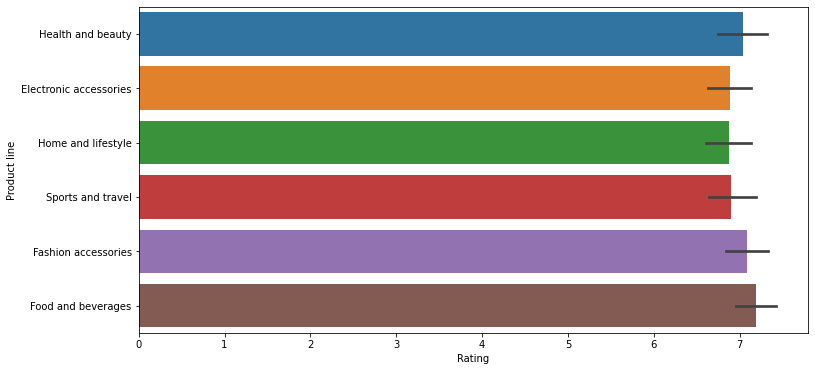

In [321]:
plt.figure(figsize = (12,6))
sns.barplot(y = data["Product line"], x = data["Rating"])
plt.show()

## Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

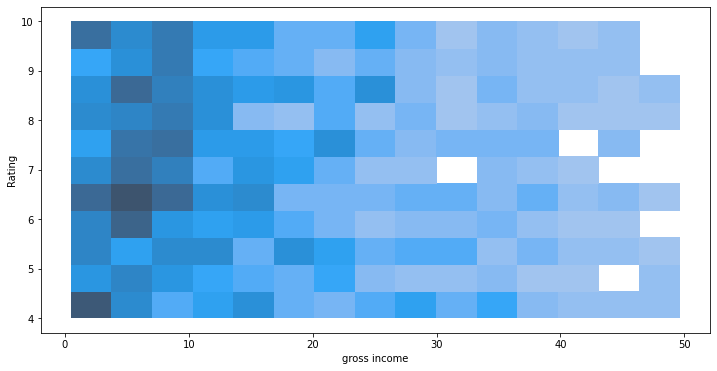

In [322]:
plt.figure(figsize = (12,6))
sns.histplot(x = data["gross income"], y = data["Rating"])

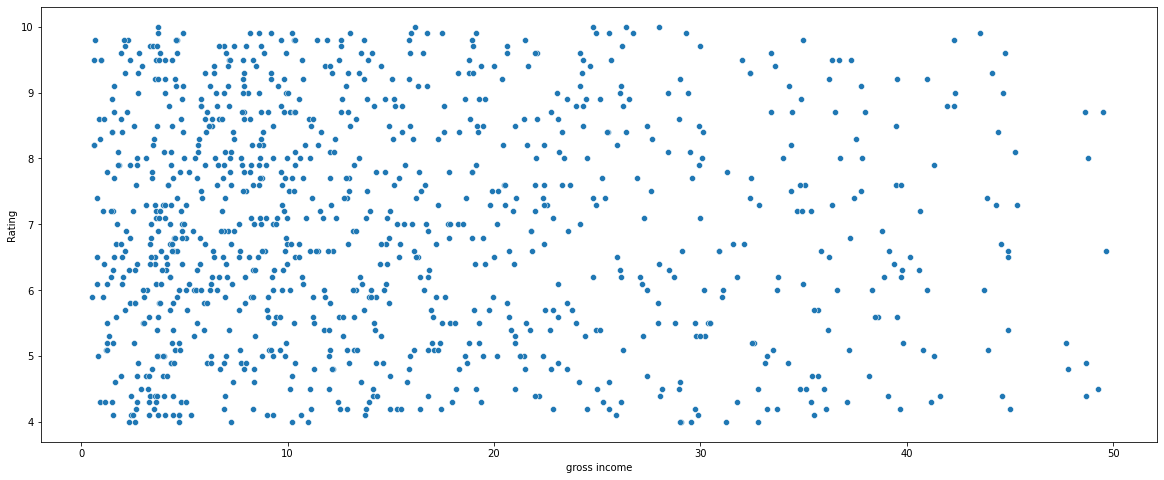

In [323]:
plt.figure(figsize=(20,8))
sns.scatterplot(x = data["gross income"], y = data["Rating"])
plt.show()

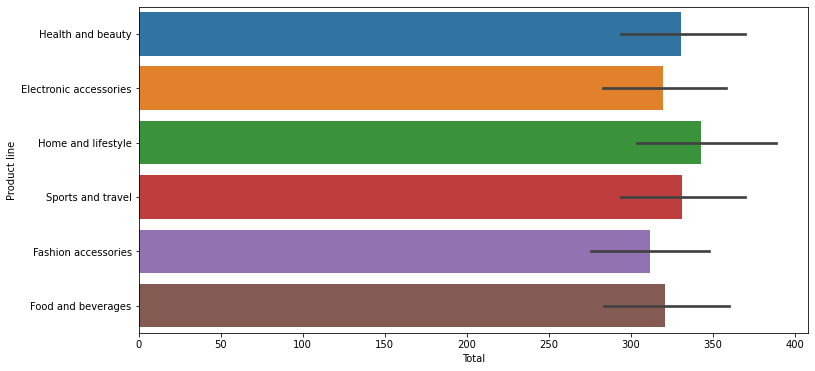

In [324]:
plt.figure(figsize=(12,6))
sns.barplot(x = data["Total"], y = data["Product line"])
plt.show()

## Task 4: Dealing With Duplicate Rows and Missing Values

In [325]:
# dealing with duplicated rows
data.duplicated().sum()

3

In [326]:
# location duplicated rows
data.loc[data.duplicated()]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
1000,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,Cash,618.38,30.919,6.6
1001,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,Ewallet,116.06,5.803,8.8
1002,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,Cash,609.56,30.478,5.5


In [327]:
# drop the duplicated rows
data = data.drop_duplicates(keep = 'first')

In [328]:
data.duplicated().sum()

0

In [329]:
data.shape

(1000, 13)

In [330]:
# deal and work with missing values
data.isnull().sum()

Branch            0
City              0
Customer type    79
Gender            0
Product line     43
Unit price        6
Quantity         19
Tax 5%            0
Total             0
Payment           0
cogs              0
gross income      0
Rating            0
dtype: int64

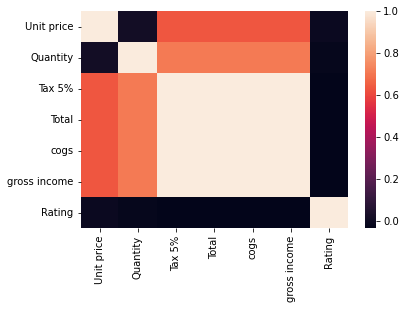

In [331]:
sns.heatmap(data = data.corr())

In [332]:
data = data.dropna()

In [333]:
data.isnull().sum()

Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

In [334]:
data.shape

(864, 13)